## import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## load the dataset

In [2]:
df=pd.read_csv("C:/Users/Prathmesh/Downloads/2020_Yellow_Taxi_Trip_Data.csv", nrows=2000000)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


## Exploratory Data Analysis

In [4]:
df.shape

(2000000, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'] )
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'] )

In [7]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2.0,2020-01-11 14:38:41,2020-01-11 15:20:23,1.0,14.32,1.0,N,138,89,2.0,43.5,0.0,0.5,0.00,0.00,0.3,44.30,0.0,41.700000
1999996,2.0,2020-01-11 14:05:28,2020-01-11 14:27:30,1.0,9.21,2.0,N,93,229,1.0,52.0,0.0,0.5,12.28,6.12,0.3,73.70,2.5,22.033333
1999997,1.0,2020-01-11 14:06:38,2020-01-11 14:24:56,1.0,9.50,1.0,N,132,56,2.0,27.0,0.0,0.5,0.00,0.00,0.3,27.80,0.0,18.300000
1999998,1.0,2020-01-11 14:33:34,2020-01-11 15:02:54,1.0,4.80,2.0,N,226,100,2.0,52.0,2.5,0.5,0.00,12.24,0.3,67.54,2.5,29.333333


In [10]:
df=df[['passenger_count', 'payment_type','fare_amount','trip_distance','duration']]

In [11]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
1999995,1.0,2.0,43.5,14.32,41.700000
1999996,1.0,1.0,52.0,9.21,22.033333
1999997,1.0,2.0,27.0,9.50,18.300000
1999998,1.0,2.0,52.0,4.80,29.333333


In [12]:
df.isnull().sum()

passenger_count    4142
payment_type       4142
fare_amount           0
trip_distance         0
duration              0
dtype: int64

In [13]:
4142/len(df)*100

0.2071

In [14]:
df.dropna(inplace=True)

In [15]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
1999995,1.0,2.0,43.5,14.32,41.700000
1999996,1.0,1.0,52.0,9.21,22.033333
1999997,1.0,2.0,27.0,9.50,18.300000
1999998,1.0,2.0,52.0,4.80,29.333333


In [16]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [17]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
1999988,1,2,4.5,0.00,4.116667
1999989,1,1,7.0,0.00,9.366667
1999993,1,1,52.0,0.05,0.233333
1999994,1,2,6.0,0.73,6.383333


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.605197
2    0.190114
3    0.061931
5    0.053969
4    0.033866
6    0.032905
0    0.021995
7    0.000010
8    0.000008
9    0.000004
Name: proportion, dtype: float64

In [20]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.668999
2    0.318984
3    0.007588
4    0.004429
Name: proportion, dtype: float64

In [21]:
df=df[df['payment_type']<3]
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [22]:
df.shape

(1159670, 5)

In [23]:
df['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [24]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.159670e+06,1.159670e+06,1.159670e+06,1.159670e+06
mean,1.671414e+00,1.593173e+01,4.017209e+00,2.069401e+01
std,1.122107e+00,1.413842e+01,4.661901e+00,8.327197e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.000000e+00,1.300000e+00,8.333333e+00
50%,1.000000e+00,1.150000e+01,2.300000e+00,1.343333e+01
75%,2.000000e+00,1.800000e+01,4.510000e+00,2.033333e+01
max,5.000000e+00,1.238000e+03,2.592200e+02,4.168000e+03


In [25]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [26]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,1.148127e+06,1.148127e+06,1.148127e+06,1.148127e+06
mean,1.674389e+00,1.577782e+01,4.053732e+00,2.069528e+01
std,1.124110e+00,1.355664e+01,4.665343e+00,8.316064e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.320000e+00,8.383333e+00
50%,1.000000e+00,1.150000e+01,2.320000e+00,1.345000e+01
75%,2.000000e+00,1.800000e+01,4.560000e+00,2.030000e+01
max,5.000000e+00,1.238000e+03,2.592200e+02,2.458400e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x2a230af8390>,
 'caps': [<matplotlib.lines.Line2D at 0x2a230af96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a230ae36d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a230afab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a230afb4d0>],
 'means': []}

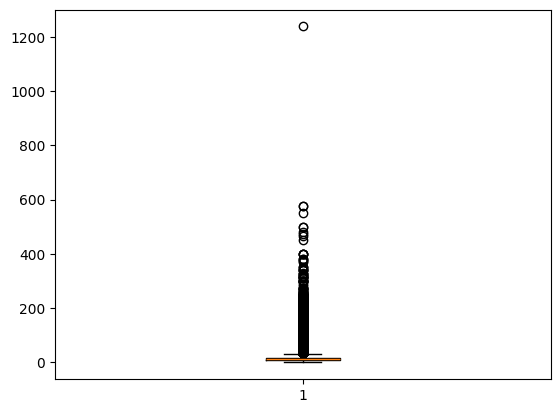

In [27]:
plt.boxplot(df['fare_amount'])

In [28]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [29]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
1999972,1,card,20.0,5.12,24.500000
1999985,3,cash,16.0,3.20,22.783333
1999987,1,cash,21.0,5.87,22.033333
1999990,2,card,16.5,4.43,17.283333


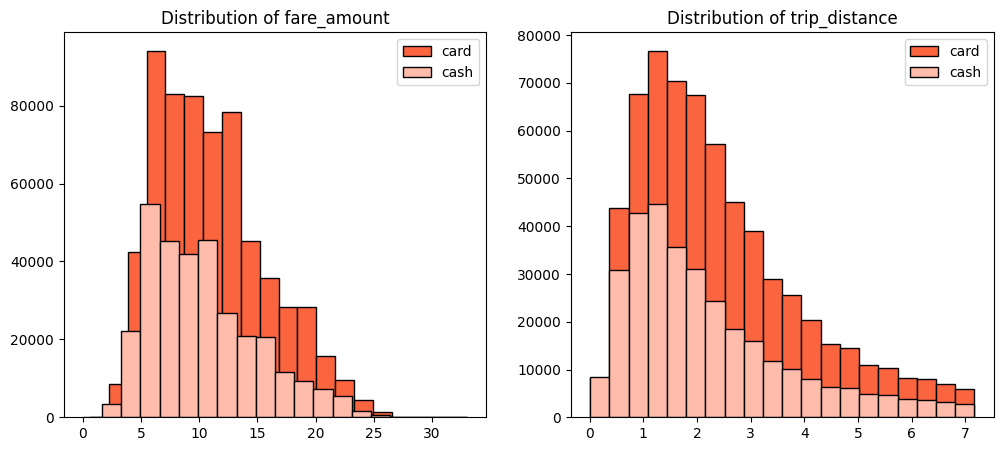

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare_amount')
plt.hist(df[df['payment_type']=='card']['fare_amount'],histtype='barstacked', bins=20,edgecolor='black',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'],histtype='barstacked', bins=20,edgecolor='black',color='#FFBCAB',label='cash')
plt.legend()


plt.subplot(1,2,2)
plt.title('Distribution of trip_distance')
plt.hist(df[df['payment_type']=='card']['trip_distance'],histtype='barstacked', bins=20,edgecolor='black',color='#FA643F',label='card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'],histtype='barstacked', bins=20,edgecolor='black',color='#FFBCAB',label='cash')
plt.legend()
plt.show()

In [31]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
card           11.119495  4.710255      2.418387  1.525424
cash           10.323414  4.676477      2.188424  1.529881

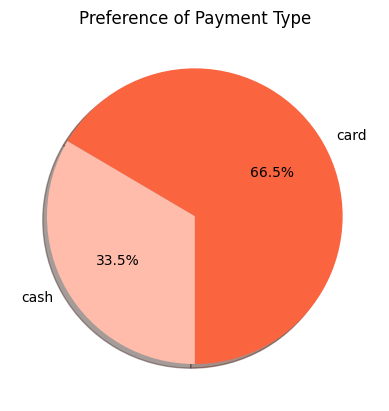

In [32]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels=df['payment_type'].value_counts().index,
        startangle=-90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

In [33]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

passenger_count

,payment_type,passenger_count,count,perc
0,card,1,390485,41.163653
1,card,2,131895,13.903940
2,card,3,44427,4.683349
3,card,4,22092,2.328866
4,card,5,42119,4.440047
5,cash,1,201323,21.222813
6,cash,2,64160,6.763538
7,cash,3,21541,2.270782
8,cash,4,13663,1.440309
9,cash,5,16911,1.782702


In [34]:
n_df=pd.DataFrame(columns=['payment_type', 1,2,3,4,5])
n_df['payment_type']=['card','cash']
n_df.iloc[0,1:]=passenger_count.iloc[0:5,-1]
n_df.iloc[1,1:]=passenger_count.iloc[5:,-1]
n_df

,payment_type,1,2,3,4,5
0,card,41.163653,13.90394,4.683349,2.328866,4.440047
1,cash,21.222813,6.763538,2.270782,1.440309,1.782702


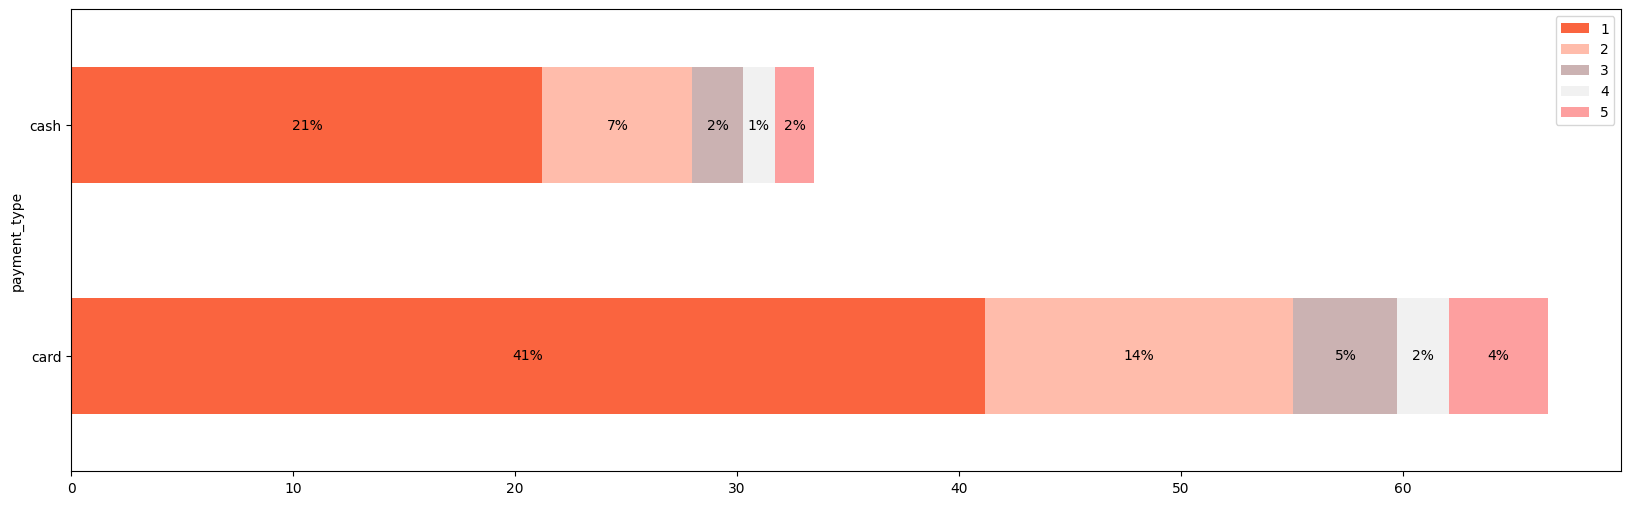

In [35]:
fig,ax=plt.subplots(figsize=(20,6))
n_df.plot(x='payment_type', kind='barh', stacked=True,ax=ax,color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

### Null Hypothesis: there is no difference between average fare between customers who use card for payment and customer who use cash for payment
### Alternative Hypothesis: Hypothesis: there is difference between average fare between customers who use card for payment and customer who use cash for payment

In [39]:
card_sample = df[df['payment_type'] == 'card']['fare_amount']
cash_sample = df[df['payment_type'] == 'cash']['fare_amount']


In [37]:
from scipy.stats import skew, kurtosis

skewness = skew(df['fare_amount'])
kurt = kurtosis(df['fare_amount'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: 0.6714956059277728
Kurtosis: -0.14198218015473074


In [38]:
t_stats, p_value = stats.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistic', t_stats, 'p-value', p_value)

T statistic 78.05512975906966 p-value 0.0
